In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
from tensorflow.keras import utils

os.listdir('/content/drive/MyDrive/deepfake_database1')

['train1', 'test1', 'validation1']

In [ ]:
len(os.listdir(('/content/drive/MyDrive/deepfake_database1/train1/df')))

5000

In [ ]:
train_dir = '/content/drive/MyDrive/deepfake_database1/train1'
test_dir = '/content/drive/MyDrive/deepfake_database1/test1'
val_dir = '/content/drive/MyDrive/deepfake_database1/validation1'

print("Train set:\n========================================")
num_df = len(os.listdir(os.path.join(train_dir, 'df')))
num_real = len(os.listdir(os.path.join(train_dir, 'real')))
print(f"DEEPFAKE={num_df}")
print(f"REAL={num_real}")

print("Test set:\n========================================")
print(f"DEEPFAKE={len(os.listdir(os.path.join(test_dir, 'df')))}")
print(f"REAL={len(os.listdir(os.path.join(test_dir, 'real')))}")

print("Validation set:\n========================================")
print(f"DEEPFAKE={len(os.listdir(os.path.join(val_dir, 'df')))}")
print(f"REAL={len(os.listdir(os.path.join(val_dir, 'real')))}")

Train set:
DEEPFAKE=5000
REAL=5010
Test set:
DEEPFAKE=1000
REAL=1000
Validation set:
DEEPFAKE=200
REAL=200


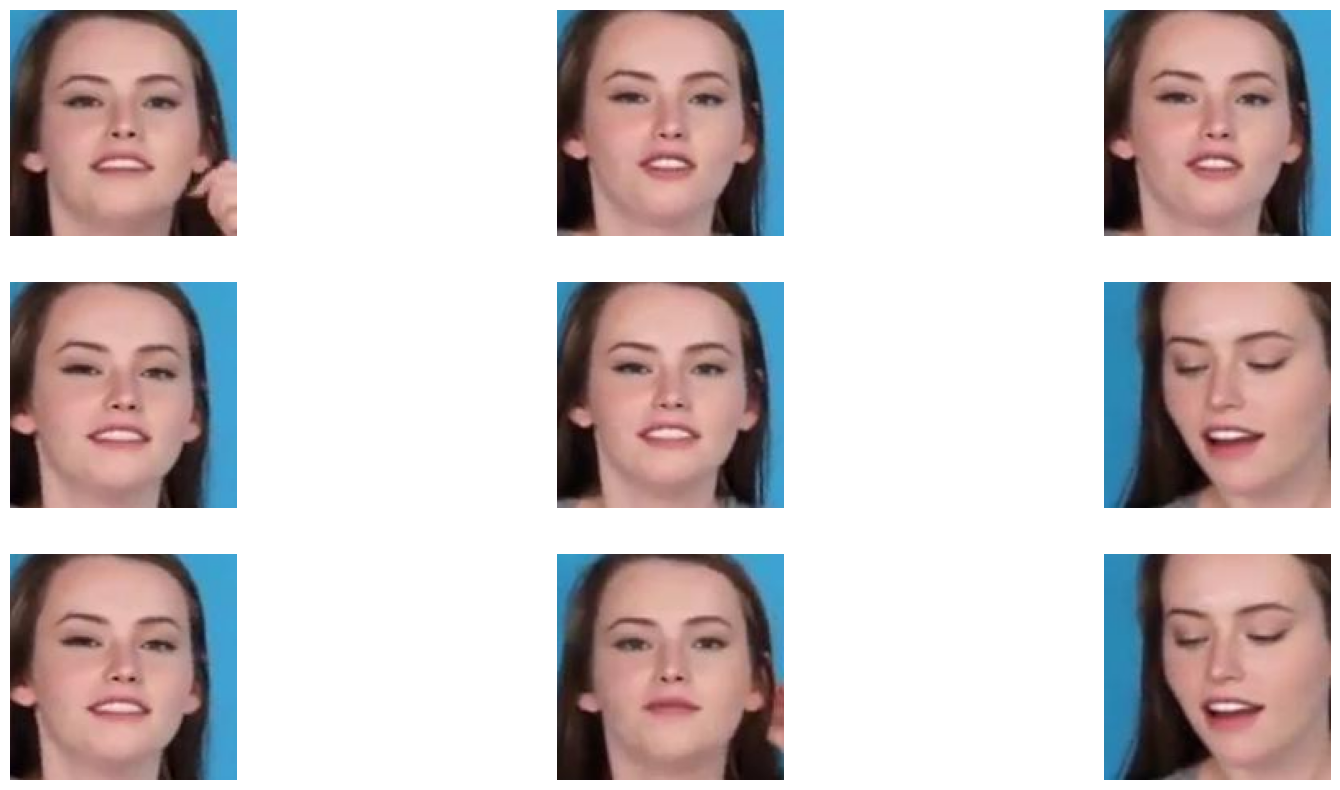

In [ ]:
df = os.listdir('/content/drive/MyDrive/deepfake_database1/train1/df')
df_dir = '/content/drive/MyDrive/deepfake_database1/train1/df'

image_files = [file for file in os.listdir(df_dir) if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff'))]
plt.figure(figsize=(20, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(df_dir, image_files[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.show()

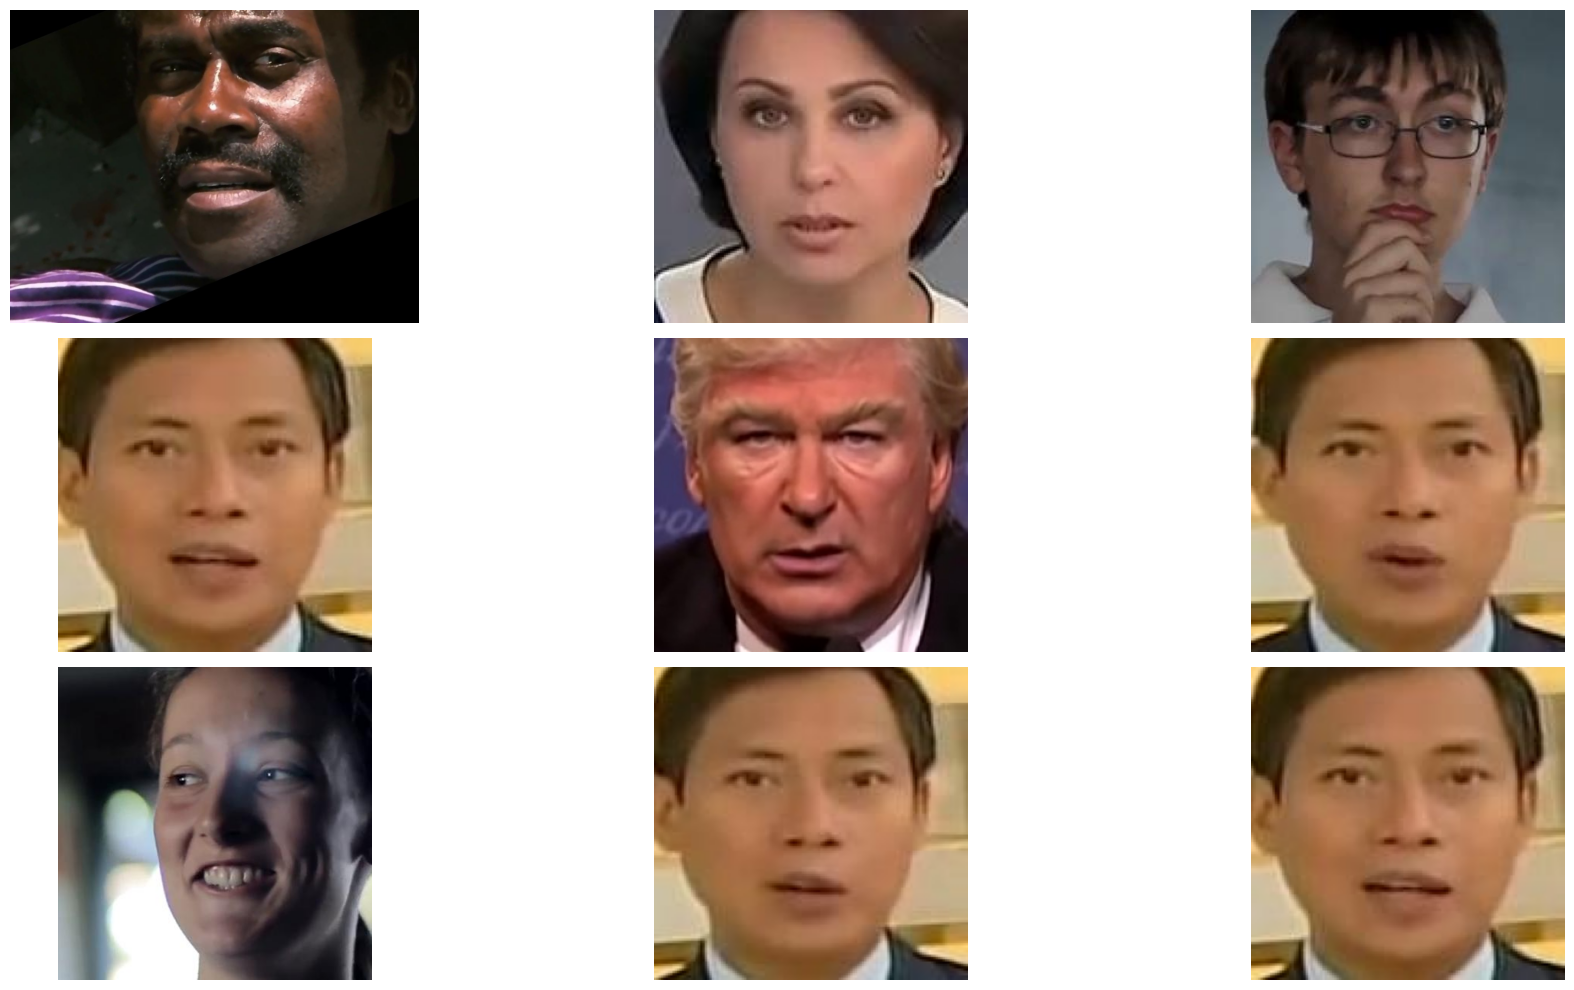

In [ ]:
real = os.listdir('/content/drive/MyDrive/deepfake_database1/train1/real')
real_dir = '/content/drive/MyDrive/deepfake_database1/train1/real'

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(real_dir, real[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()

The dimensions of the image are 851 pixels width and 1110 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 38.7174 and the standard deviation is 43.5624


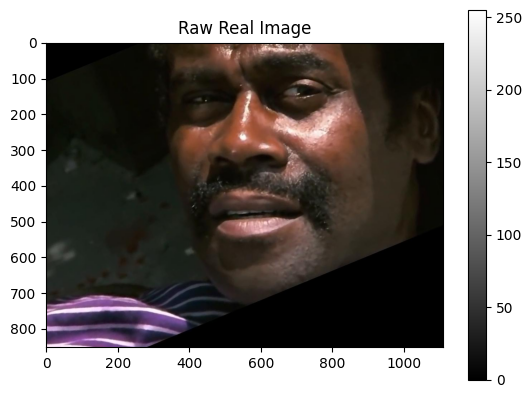

In [ ]:
real_img = os.listdir(('/content/drive/MyDrive/deepfake_database1/train1/real'))[0]
real_dir = '/content/drive/MyDrive/deepfake_database1/train1/real'
sample_img = plt.imread(os.path.join(real_dir, real_img))
plt.imshow(sample_img, cmap='gray')
plt.colorbar()
plt.title('Raw Real Image')

print(f"The dimensions of the image are {sample_img.shape[0]} pixels width and {sample_img.shape[1]} pixels height, one single color channel.")
print(f"The maximum pixel value is {sample_img.max():.4f} and the minimum is {sample_img.min():.4f}")
print(f"The mean value of the pixels is {sample_img.mean():.4f} and the standard deviation is {sample_img.std():.4f}")

<ipython-input-8-d45ac08d2db9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_img.ravel(),


Text(0, 0.5, '# Pixels in Image')

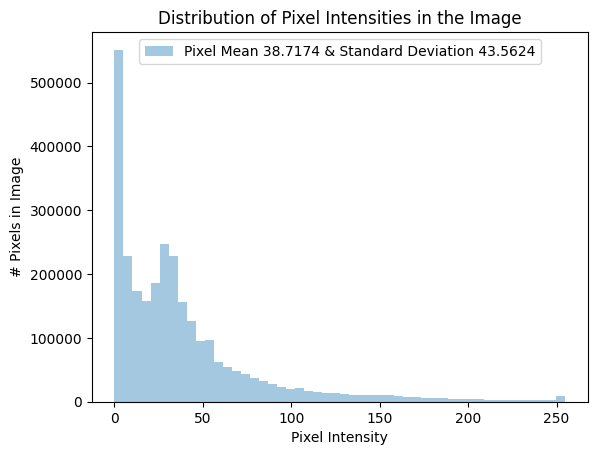

In [ ]:
sns.distplot(sample_img.ravel(),
            label=f"Pixel Mean {np.mean(sample_img):.4f} & Standard Deviation {np.std(sample_img):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

In [ ]:
train = image_generator.flow_from_directory(train_dir,
                                            batch_size=8,
                                            shuffle=True,
                                            class_mode='binary',
                                            target_size=(180, 180))

validation = image_generator.flow_from_directory(val_dir,
                                                batch_size=1,
                                                shuffle=False,
                                                class_mode='binary',
                                                target_size=(180, 180))

test = image_generator.flow_from_directory(test_dir,
                                            batch_size=1,
                                            shuffle=False,
                                            class_mode='binary',
                                            target_size=(180, 180))

Found 10010 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


The dimensions of the image are 180 pixels width and 180 pixels height, one single color channel.
The maximum pixel value is 5.1093 and the minimum is -4.3044
The mean value of the pixels is 0.0000 and the standard deviation is 1.0000


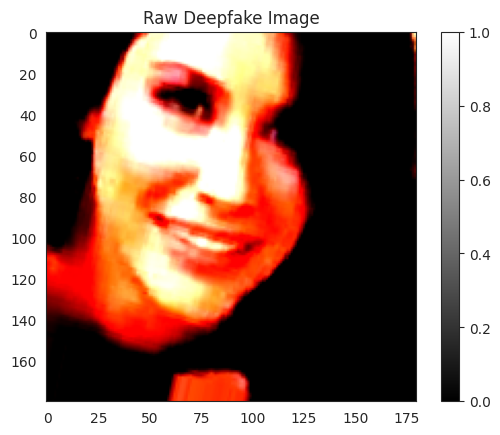

In [ ]:
sns.set_style('white')
generated_image, label = train.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Deepfake Image')

print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height, one single color channel.")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

In [ ]:
weight_for_0 = num_df/ (num_real + num_df)
weight_for_1 = num_real / (num_real + num_df)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.50
Weight for class 1: 0.50


In [ ]:
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K

In [ ]:
base_model = DenseNet121(input_shape=(180, 180, 3), include_top=False, weights='imagenet', pooling='avg')

29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 180, 180, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 186, 186, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 90, 90, 64)           9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 90, 90, 64)           256       ['conv1/conv[0][0]']

In [ ]:
base_model = DenseNet121(include_top=False, weights='imagenet')
x = base_model.output

x = GlobalAveragePooling2D()(x)

predictions = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
r = model.fit(
    train,
    epochs=5,
    validation_data=validation,
    class_weight=class_weight,
    steps_per_epoch=100,
    validation_steps=25,
)

Epoch 1/5
100/100 [==============================] - 450s 4s/step - loss: 0.3196 - accuracy: 0.7138 - val_loss: 1.5738 - val_accuracy: 0.8400
Epoch 2/5
100/100 [==============================] - 365s 4s/step - loss: 0.2200 - accuracy: 0.8000 - val_loss: 0.1106 - val_accuracy: 1.0000
Epoch 3/5
100/100 [==============================] - 378s 4s/step - loss: 0.1614 - accuracy: 0.8700 - val_loss: 0.6210 - val_accuracy: 0.6400
Epoch 4/5
100/100 [==============================] - 368s 4s/step - loss: 0.1504 - accuracy: 0.8913 - val_loss: 0.9069 - val_accuracy: 0.6000
Epoch 5/5
100/100 [==============================] - 360s 4s/step - loss: 0.1311 - accuracy: 0.8900 - val_loss: 4.4399e-04 - val_accuracy: 1.0000


In [ ]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

2000/2000 [==============================] - 287s 144ms/step - loss: 0.6688 - accuracy: 0.8165
Test Accuracy: 81.65%
1252/1252 [==============================] - 1053s 841ms/step - loss: 0.5285 - accuracy: 0.8506
Train Accuracy: 85.06%


In [ ]:
predicted_vals = model.predict(test, steps=len(test))

2000/2000 [==============================] - 290s 141ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(test.classes, predicted_vals > 0.5))
pd.DataFrame(classification_report(test.classes, predicted_vals > 0.5, output_dict=True))

[[964  36]
 [354 646]]


,0,1,accuracy,macro avg,weighted avg
precision,0.731411,0.947214,0.805,0.839313,0.839313
recall,0.964000,0.646000,0.805,0.805000,0.805000
f1-score,0.831752,0.768133,0.805,0.799942,0.799942
support,1000.000000,1000.000000,0.805,2000.000000,2000.000000


Text(0.5, 1.0, 'Accuracy Evolution')

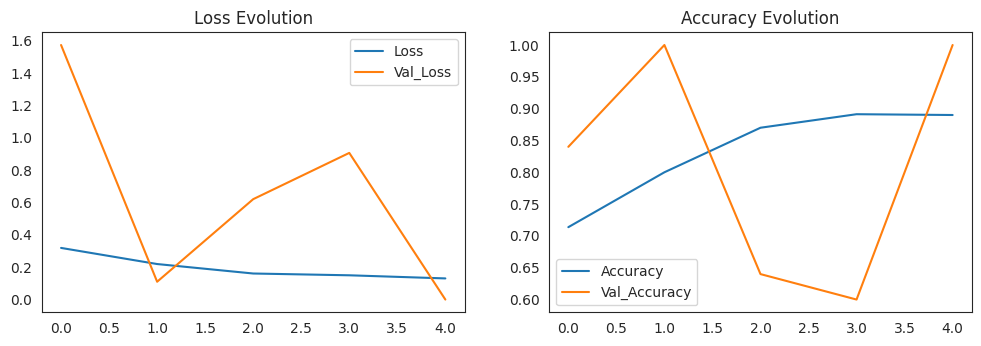

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
model.save('densenet121_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
loaded_model = tf.keras.models.load_model('densenet121_model.h5')

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
single_image_path = '/content/drive/MyDrive/deepfake_database1/train2/df/df00946.jpg'
img = image.load_img(single_image_path, target_size=(224,224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

In [ ]:
prediction = loaded_model.predict(img_array)

1/1 [==============================] - 0s 162ms/step


In [ ]:
print("Predicted Probability:", prediction[0])

Predicted Probability: [0.02769478]


In [ ]:
binary_prediction = int(prediction > 0.1)
print("Binary Prediction (0 or 1):", binary_prediction)

Binary Prediction (0 or 1): 0


<ipython-input-85-9b17de9a0341>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  binary_prediction = int(prediction > 0.1)


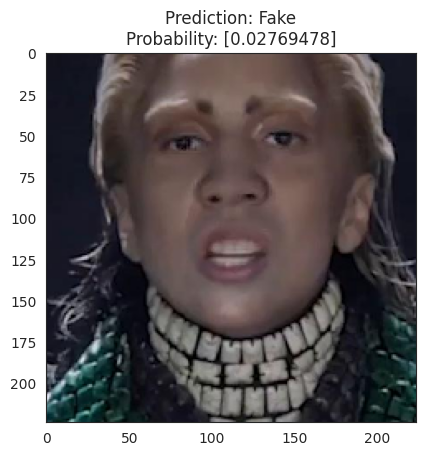

In [ ]:
class_labels = ['Fake', 'Real']
class_prediction = class_labels[binary_prediction]
plt.imshow(img)
plt.title(f'Prediction: {class_prediction}\nProbability: {prediction[0]}')
plt.show()

In [ ]:
single_image_path = '/content/drive/MyDrive/deepfake_database1/train2/real/real01222.jpg'
img = image.load_img(single_image_path, target_size=(224,224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

In [ ]:
prediction = loaded_model.predict(img_array)

1/1 [==============================] - 0s 204ms/step


In [ ]:
print("Predicted Probability:", prediction[0])

Predicted Probability: [0.2208956]


In [ ]:
binary_prediction = int(prediction > 0.1)
print("Binary Prediction (0 or 1):", binary_prediction)

Binary Prediction (0 or 1): 1


<ipython-input-102-9b17de9a0341>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  binary_prediction = int(prediction > 0.1)


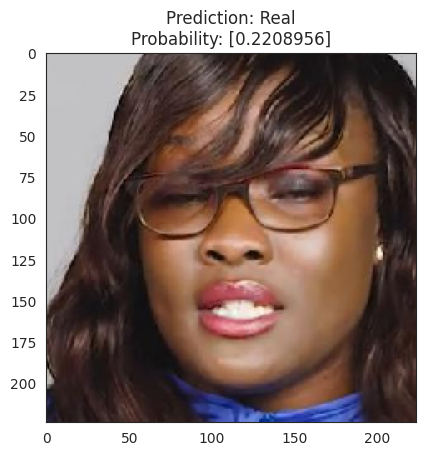

In [ ]:
class_labels = ['Fake', 'Real']
class_prediction = class_labels[binary_prediction]
plt.imshow(img)
plt.title(f'Prediction: {class_prediction}\nProbability: {prediction[0]}')
plt.show()